In this file I'm going to demonstrate more Linear Regression basics with a simple csv file, with multiple yet small datasets

In [7]:
path="data/ansc.csv"

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
data = pd.read_csv(path)

data.head()

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47


may be linear


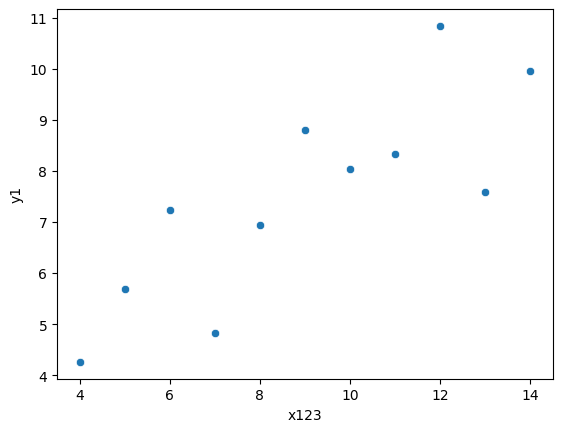

In [40]:
sns.scatterplot(data,x="x123",y="y1")
plt.savefig('results/x123-y1_scatter_plot.png')  # Save as PNG
print("may be linear")


May not be linear


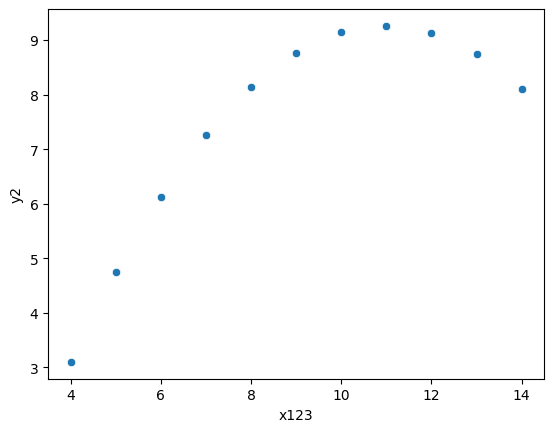

In [41]:
sns.scatterplot(data,x="x123",y="y2")
plt.savefig('results/x123-y2_scatter_plot.png')
print("May not be linear")

May not be linear


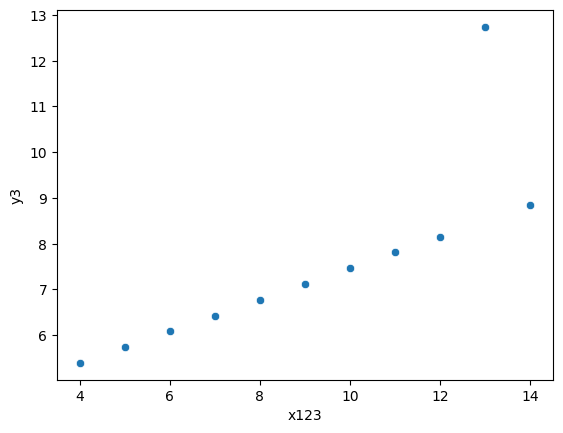

In [42]:
sns.scatterplot(data,x="x123",y="y3")
plt.savefig('results/x123-y3_scatter_plot.png')
print("May not be linear")

May not be linear


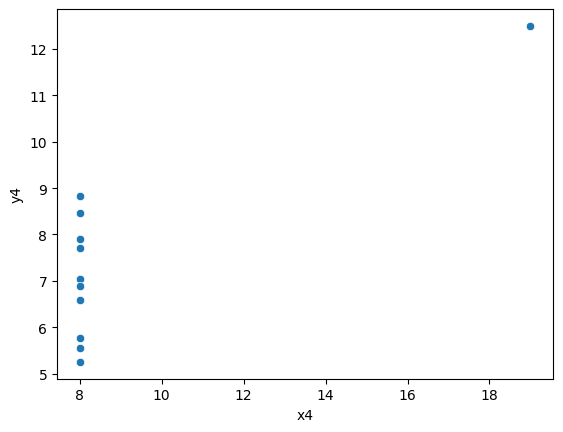

In [43]:
sns.scatterplot(data,x="x4",y="y4")
plt.savefig('results/x4-y4_scatter_plot.png')
print("May not be linear")

In [44]:
X123 = np.array(data["x123"]).reshape(-1,1)
X4 = np.array(data["x4"]).reshape(-1,1)

Y1 = np.array(data["y1"]).reshape(-1,1)
Y2 = np.array(data["y2"]).reshape(-1,1)
Y3 = np.array(data["y3"]).reshape(-1,1)
Y4 = np.array(data["y4"]).reshape(-1,1)

In [45]:
reg1 = LinearRegression()
reg2 = LinearRegression()
reg3 = LinearRegression()
reg4 = LinearRegression()

reg1.fit(X123,Y1)
reg2.fit(X123,Y2)
reg3.fit(X123,Y3)
reg4.fit(X4,Y4)

LinearRegression()

In [46]:
y1pred = reg1.predict(X123)
y2pred = reg2.predict(X123)
y3pred = reg3.predict(X123)
y4pred = reg4.predict(X4)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the dictionary to store results
metrics = {
    'Name': [],
    'Coefficient': [],
    'intercept': [],
    'MSE': [],
    'R2': []
}

# List of models, their training data, true values, and predictions
models = [
    (reg1, X123, Y1, y1pred, 'reg1'),
    (reg2, X123, Y2, y2pred, 'reg2'),
    (reg3, X123, Y3, y3pred, 'reg3'),
    (reg4, X4, Y4, y4pred, 'reg4')
]

for model, X, Y, y_pred, name in models:
    # Append the model's name
    metrics['Name'].append(name)

    # Append the coefficient and intercept
    metrics['Coefficient'].append(model.coef_[0][0])
    metrics['intercept'].append(model.intercept_[0])

    # Calculate and append the Mean Squared Error
    metrics['MSE'].append(mean_squared_error(Y, y_pred))

    # Calculate and append the R² score
    metrics['R2'].append(r2_score(Y, y_pred))

# Convert the dictionary to a DataFr
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame (this will display the dictionary as a table)
print(metrics_df)


   Name  Coefficient  intercept       MSE        R2
0  reg1     0.500091   3.000091  1.251154  0.666542
1  reg2     0.500000   3.000909  1.252390  0.666242
2  reg3     0.499727   3.002455  1.250563  0.666324
3  reg4     0.499909   3.001727  1.249317  0.666707


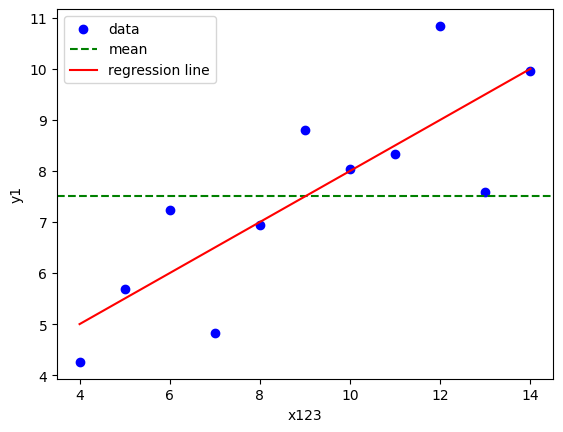

In [48]:
slope = reg1.coef_[0]
# Get the slope (coefficient).

intercept = reg1.intercept_
# Get the intercept.

# Generate points for the regression line.
X_line = np.linspace(X123.min(), X123.max(), 100).reshape(-1, 1)
y_line = slope * X_line + intercept

# Plot data and the regression line.
plt.scatter(X123, Y1, color='blue', label='data')
plt.axhline(y=Y1.mean(), color='green', linestyle='--', label='mean')
plt.plot(X_line, y_line, color='red', label='regression line')

plt.xlabel('x123')
plt.ylabel('y1')
plt.savefig('results/x123-y1_linear_regression.png')
plt.legend()
plt.show()


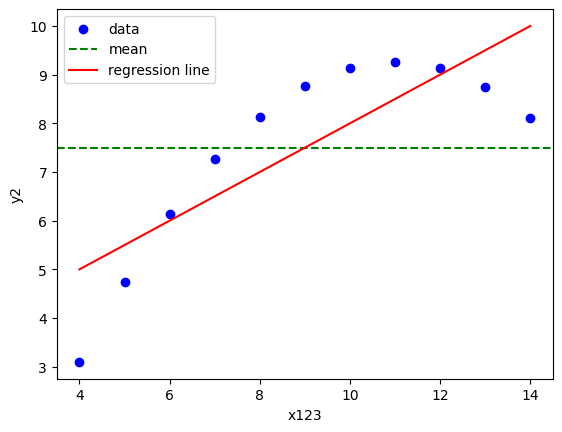

In [49]:
slope = reg2.coef_[0]
# Get the slope (coefficient).

intercept = reg2.intercept_
# Get the intercept.

# Generate points for the regression line.
X_line = np.linspace(X123.min(), X123.max(), 100).reshape(-1, 1)
y_line = slope * X_line + intercept

# Plot data and the regression line.
plt.scatter(X123, Y2, color='blue', label='data')
plt.axhline(y=Y2.mean(), color='green', linestyle='--', label='mean')
plt.plot(X_line, y_line, color='red', label='regression line')

plt.xlabel('x123')
plt.ylabel('y2')
plt.savefig('results/x123-y2_linear_regression.png')
plt.legend()
plt.show()


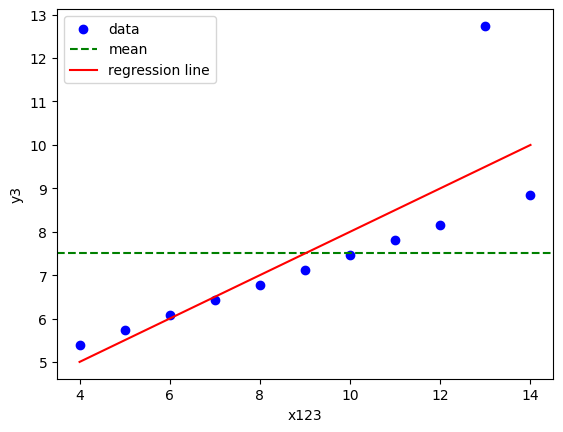

In [50]:
slope = reg3.coef_[0]
# Get the slope (coefficient).

intercept = reg3.intercept_
# Get the intercept.

# Generate points for the regression line.
X_line = np.linspace(X123.min(), X123.max(), 100).reshape(-1, 1)
y_line = slope * X_line + intercept

# Plot data and the regression line.
plt.scatter(X123, Y3, color='blue', label='data')
plt.axhline(y=Y3.mean(), color='green', linestyle='--', label='mean')
plt.plot(X_line, y_line, color='red', label='regression line')

plt.xlabel('x123')
plt.ylabel('y3')
plt.savefig('results/x123-y3_linear_regression.png')
plt.legend()
plt.show()

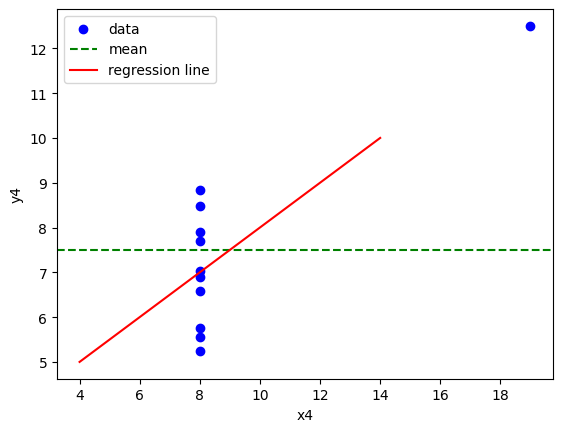

In [51]:
slope = reg4.coef_[0]
# Get the slope (coefficient).

intercept = reg4.intercept_
# Get the intercept.

# Generate points for the regression line.
X_line = np.linspace(X123.min(), X123.max(), 100).reshape(-1, 1)
y_line = slope * X_line + intercept

# Plot data and the regression line.
plt.scatter(X4, Y4, color='blue', label='data')
plt.axhline(y=Y4.mean(), color='green', linestyle='--', label='mean')
plt.plot(X_line, y_line, color='red', label='regression line')

plt.xlabel('x4')
plt.ylabel('y4')
plt.savefig('results/x4-y4_linear_regression.png')
plt.legend()
plt.show()

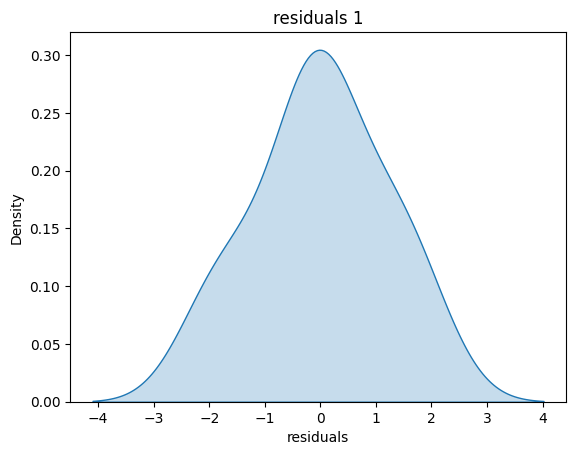

Looks like a normal


In [52]:
residuals1 = Y1 - y1pred
residuals1 = residuals1.reshape(1, -1)
residuals1 = residuals1[0]
res_df = pd.DataFrame({'residuals': residuals1})
sns.kdeplot(res_df['residuals'], fill=True)
plt.title("residuals 1")
plt.savefig('results/x123-y1_residuals_density.png')
plt.show()

print("Looks like a normal")

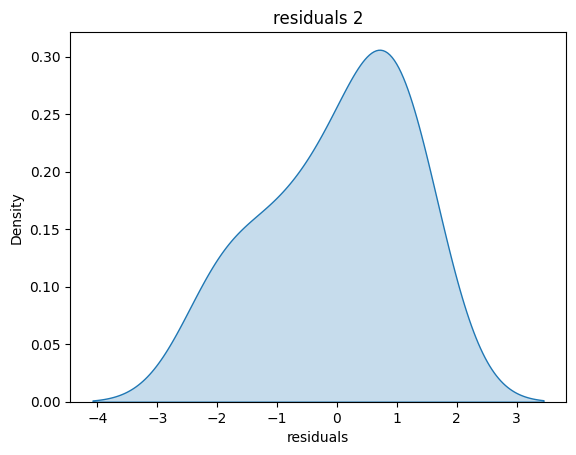

Definetely not normal


In [53]:
residuals2 = Y2 - y2pred
residuals2 = residuals2.reshape(1, -1)
residuals2 = residuals2[0]
res_df = pd.DataFrame({'residuals': residuals2})
sns.kdeplot(res_df['residuals'], fill=True)
plt.title("residuals 2")
plt.savefig('results/x123-y2_residuals_density.png')
plt.show()

print("Definetely not normal")

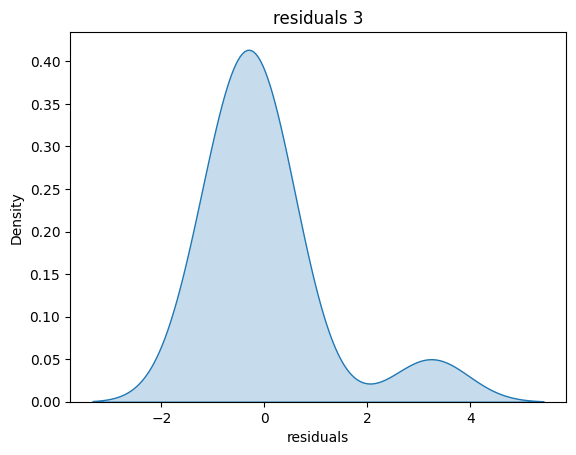

Definetely not normal


In [54]:
residuals3 = Y3 - y3pred
residuals3 = residuals3.reshape(1, -1)
residuals3 = residuals3[0]
res_df = pd.DataFrame({'residuals': residuals3})
sns.kdeplot(res_df['residuals'], fill=True)
plt.title("residuals 3")
plt.savefig('results/x123-y3_residuals_density.png')
plt.show()

print("Definetely not normal")

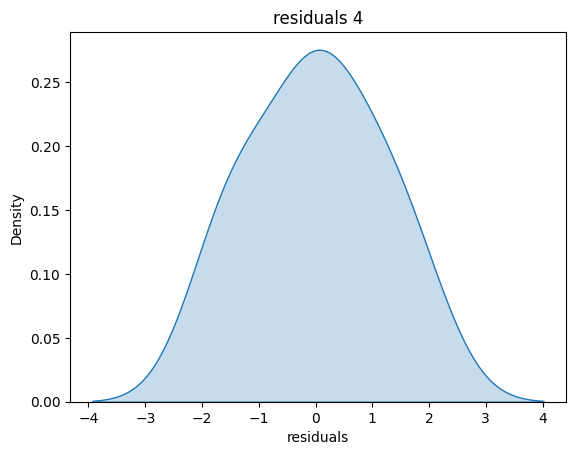

May be normal


In [55]:
residuals4 = Y4 - y4pred
residuals4 = residuals4.reshape(1, -1)
residuals4 = residuals4[0]
res_df = pd.DataFrame({'residuals': residuals4})
sns.kdeplot(res_df['residuals'], fill=True)
plt.title("residuals 4")
plt.savefig('results/x4-y4_residuals_density.png')
plt.show()

print("May be normal")

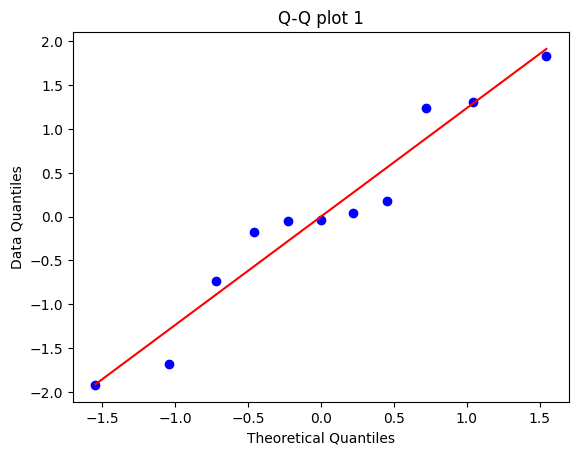

Note: Could be a normal


In [56]:

(osm, osr), (slope, intercept, r) = stats.probplot(residuals1, dist='norm', plot = plt)
plt.title('Q-Q plot 1')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.savefig('results/x123-y1_data_quantiles.png')

plt.show()

print("Note: Could be a normal")

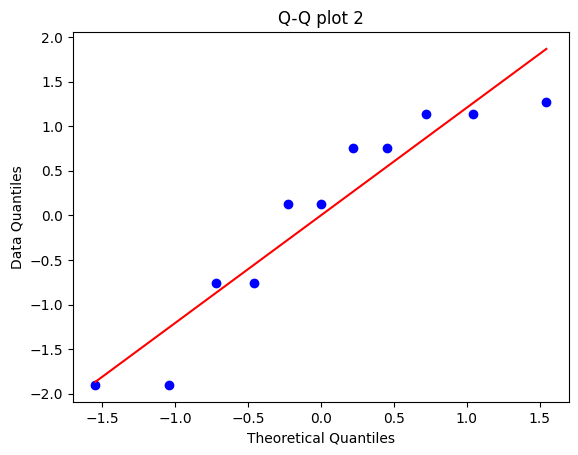

Note: Could be a normal


In [57]:

(osm, osr), (slope, intercept, r)= stats.probplot(residuals2, dist='norm', plot = plt)
plt.title('Q-Q plot 2')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.savefig('results/x123-y2_data_quantiles.png')
plt.show()

print("Note: Could be a normal")

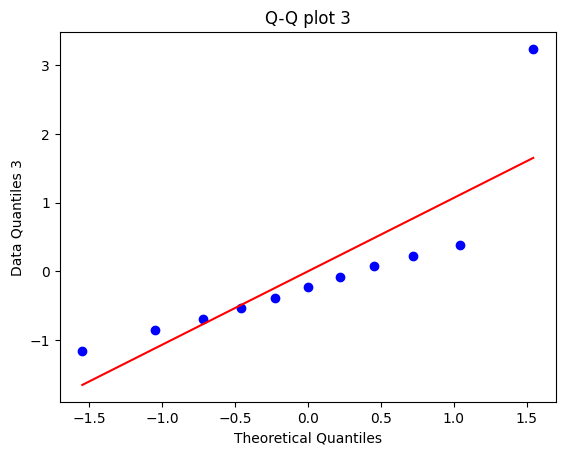

Note: it is clearly not a normal 


In [58]:

(osm, osr), (slope, intercept, r)= stats.probplot(residuals3, dist='norm', plot = plt)
plt.title('Q-Q plot 3')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles 3')
plt.savefig('results/x123-y3_data_quantiles.png')
plt.show()

print("Note: it is clearly not a normal ")

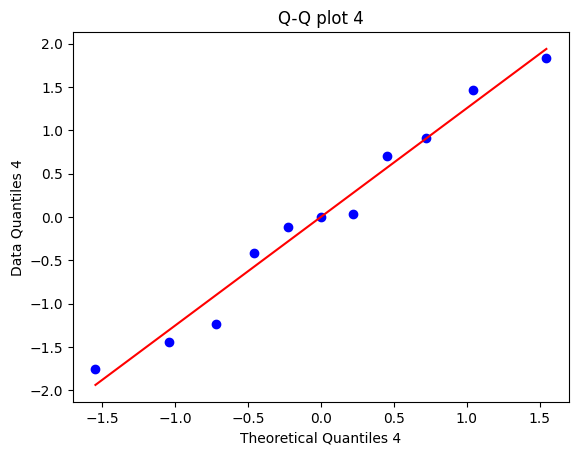

Note: it is highly probable it distributes like a normal 


In [59]:

(osm, osr), (slope, intercept, r)= stats.probplot(residuals4, dist='norm', plot = plt)
plt.title('Q-Q plot 4')
plt.xlabel('Theoretical Quantiles 4')
plt.ylabel('Data Quantiles 4')
plt.savefig('results/x4-y4_data_quantiles.png')
plt.show()

print("Note: it is highly probable it distributes like a normal ")

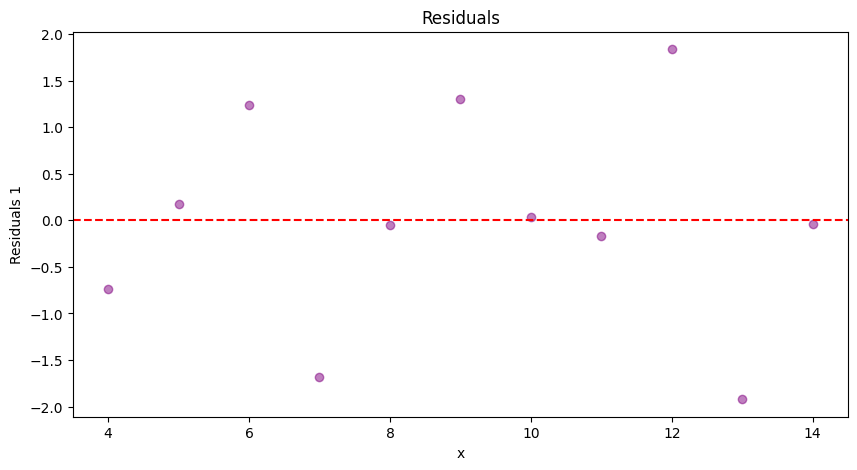

could be valid


In [60]:
plt.figure(figsize=(10, 5))
plt.scatter(X123, residuals1, color = 'purple', alpha=0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Residuals 1')
plt.savefig('results/x123-y1_residuals.png')
plt.show()

print("could be valid")

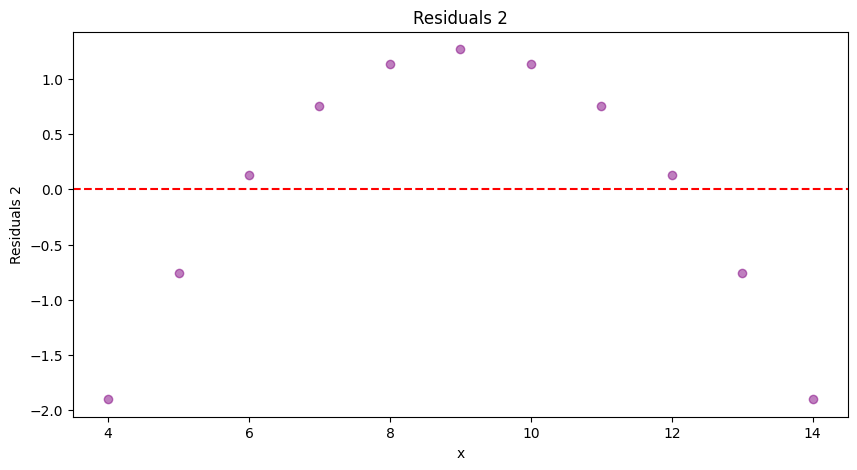

could be valid


In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(X123, residuals2, color = 'purple', alpha=0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.title('Residuals 2')
plt.xlabel('x')
plt.ylabel('Residuals 2')
plt.savefig('results/x123-y2_residuals.png')
plt.show()

print("could be valid")

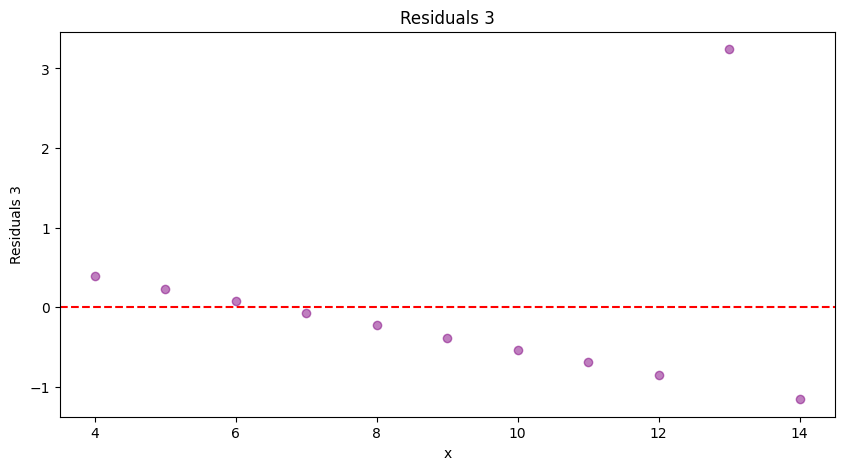

could be valid


In [62]:
plt.figure(figsize=(10, 5))
plt.scatter(X123, residuals3, color = 'purple', alpha=0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.title('Residuals 3')
plt.xlabel('x')
plt.ylabel('Residuals 3')
plt.savefig('results/x123-y3_residuals.png')
plt.show()

print("could be valid")

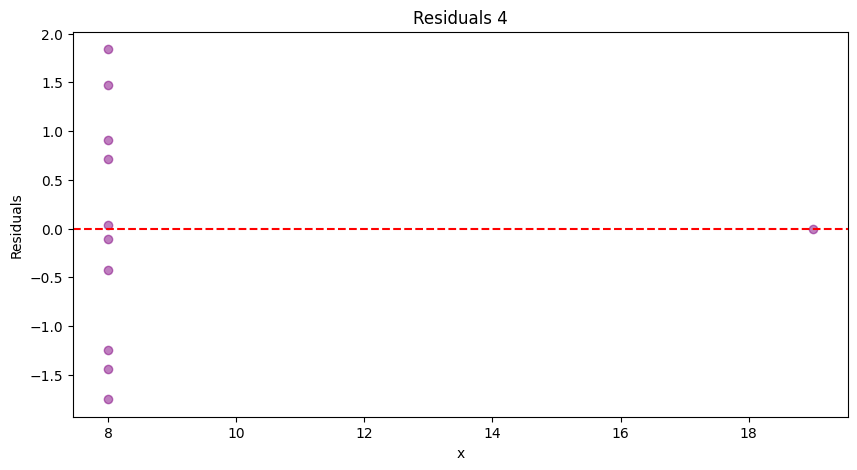

could be valid


In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(X4, residuals4, color = 'purple', alpha=0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.title('Residuals 4')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.savefig('results/x4-y4_residuals.png')
plt.show()

print("could be valid")

In [64]:
statistic, p_value = stats.shapiro(residuals1)
#learn shapiro
print("Shapiro 1")
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data does not follow a normal distribution')
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')


Shapiro 1
statistic: 0.9421076774597168
p value: 0.5455849170684814
We fail to reject the null hypothesis. The data might follow a normal distribution


In [65]:
statistic, p_value = stats.shapiro(residuals2)
#learn shapiro
print("Shapiro 2")
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data does not follow a normal distribution')
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')


Shapiro 2
statistic: 0.8761528730392456
p value: 0.09294866025447845
We fail to reject the null hypothesis. The data might follow a normal distribution


In [66]:
statistic, p_value = stats.shapiro(residuals3)
#learn shapiro
print("Shapiro 3")
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data does not follow a normal distribution')
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')


Shapiro 3
statistic: 0.7407337427139282
p value: 0.0015740625094622374
We reject the null hypothesis, the data does not follow a normal distribution


In [67]:
statistic, p_value = stats.shapiro(residuals4)
#learn shapiro
print("Shapiro 4")
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data does not follow a normal distribution')
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')


Shapiro 4
statistic: 0.9606721997261047
p value: 0.78005051612854
We fail to reject the null hypothesis. The data might follow a normal distribution
